# EE 399
### Ting Jones
### 4/4/23
### HW 1


In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Problem 2i

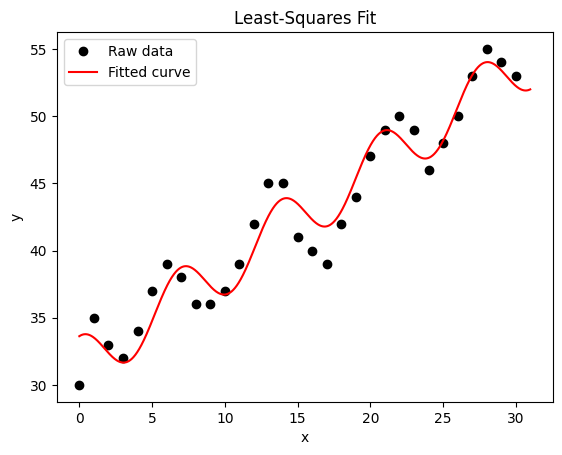

In [2]:
# define data
x = np.arange(0,31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# define the objective function
def fit_er(c, x, y):
    model = c[0]*np.cos(c[1]*x)+c[2]*x + c[3]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

# set the initial guess for the parameters
min0 = np.array([3, np.pi/4, 2/3, 32])

# perform optimization
res = opt.minimize(fit_er, min0, args=(x, y), method='Nelder-Mead')

# get the optimized parameters
mins = res.x

# generate the data for plotting
x2 = np.arange(0, 31, 0.01)
y2 = (mins[0]*np.cos(mins[1]*x2)+mins[2]*x2 + mins[3])

# plot the raw data and the fitted curve
plt.figure(1)
plt.plot(x, y, 'ko', label='Raw data')
plt.plot(x2, y2, 'r-', label='Fitted curve')
plt.title("Least-Squares Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [3]:
print("A:", mins[0], "B:", mins[1], "C:", mins[2], "D:", mins[3])
print(fit_er(mins, x, y))
# A, B, C, and D parameters in f(x) = Acos(Bx) + Cx + D model

A: 2.1716818723637914 B: 0.9093249029166655 C: 0.7324784894461773 D: 31.45291849616531
1.592725853040056


## Problem 2ii

In [4]:
LEN = 31

In [5]:
def find_err(param, sweep):
  a, b, c, d = param
  save = np.zeros((LEN,LEN))
  c_fix = np.zeros((4, LEN))
  for i in np.arange(0, LEN):
    for j in np.arange(0, LEN):
      c_fix[3] = d[j]
      if (sweep == 0):
        c_fix[0], c_fix[1], c_fix[2] = a[i], b[j], c[j]
      elif (sweep == 1):
        c_fix[0], c_fix[1], c_fix[2] = a[j], b[i], c[j]
      elif (sweep == 2):
        c_fix[0], c_fix[1], c_fix[2] = a[j], b[j], c[i]
      fit_fix = fit_er(c_fix, x, y)
      save[i][j] = fit_fix
  return save

In [6]:
bases = np.zeros((4, LEN))
ranges = np.zeros((4, LEN))
for i in np.arange(0,4):
  bases[i] = np.full((LEN), mins[i])
  range = (int) ((mins[i]) * 2)
  ranges[i] = np.linspace(mins[i]-range, mins[i]+range, LEN)

a_f, b_f, c_f, d_f = bases[0], bases[1], bases[2], bases[3]
a_r, b_r, c_r, d_r = ranges[0], ranges[1], ranges[2], ranges[3]

save_ab = find_err([a_f, b_f, c_r, d_r], 2)
save_ac = find_err([a_f, b_r, b_f, d_r], 1)
save_ad = find_err([a_f, b_r, c_r, d_f], 1)                     
save_bc = find_err([a_r, b_f, c_f, d_r], 0)
save_bd = find_err([a_r, b_f, c_r, d_f], 0)
save_cd = find_err([a_r, b_r, c_f, d_f], 0)                 

#save_ab = find_err_ab(mins[0], mins[1], np.arange(0, 1, .1), np.arange(25, 35, 1))

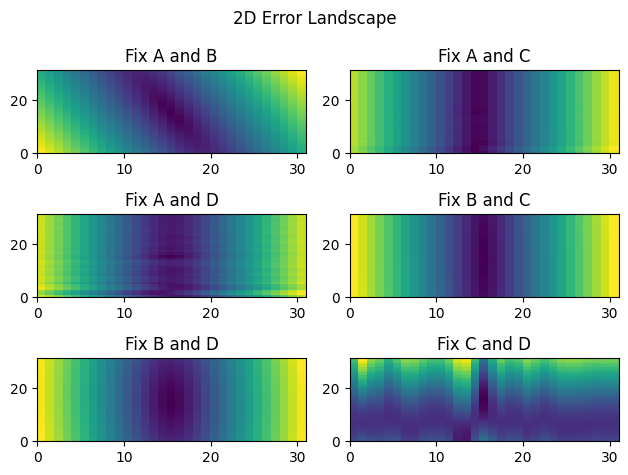

In [7]:
x3 = np.linspace(0, 31, LEN**2)

# color-mapped
plt.figure(2)
plt.subplot(321)
plt.title("Fix A and B")
plt.pcolor(save_ab)


plt.subplot(322)
plt.title("Fix A and C")
plt.pcolor(save_ac)

plt.subplot(323)
plt.title("Fix A and D")
plt.pcolor(save_ad)

plt.subplot(324)
plt.title("Fix B and C")
plt.pcolor(save_bc)

plt.subplot(325)
plt.title("Fix B and D")
plt.pcolor(save_bd)

plt.subplot(326)
plt.title("Fix C and D")
plt.pcolor(save_cd)

plt.suptitle("2D Error Landscape")
plt.tight_layout()


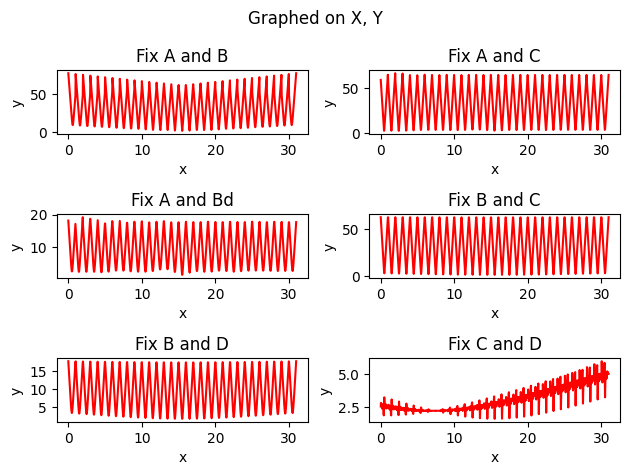

In [8]:
plt.figure(3)

plt.subplot(321)
plt.title("Fix A and B")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x3, np.ndarray.flatten(save_ab), 'r-')

plt.subplot(322)
plt.title("Fix A and C")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x3, np.ndarray.flatten(save_ac), 'r-')

plt.subplot(323)
plt.title("Fix A and Bd")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x3, np.ndarray.flatten(save_ad), 'r-')

plt.subplot(324)
plt.title("Fix B and C")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x3, np.ndarray.flatten(save_bc), 'r-')

plt.subplot(325)
plt.title("Fix B and D")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x3, np.ndarray.flatten(save_bd), 'r-')

plt.subplot(326)
plt.title("Fix C and D")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x3, np.ndarray.flatten(save_cd), 'r-')

plt.suptitle("Graphed on X, Y")
plt.tight_layout()

## Problem 2iii

In [109]:
train_x = x[:20]
train_y = y[:20]

In [22]:
# define the objective function
def fit_line(c, train_x, train_y):
    model = c[0] * train_x + c[1]
    er = np.sqrt(np.sum((model-train_y)**2)/len(train_x))
    return er

def fit_parab(c, train_x, train_y):
    model = c[0] * train_x ** 2 + c[1] * train_x + c[2]
    er = np.sqrt(np.sum((model-train_y)**2)/len(train_x))
    return er

def fit_poly(c, train_x, train_y):
    n = len(c)
    model = 0
    for i in np.arange(0, n):
      model += c[i] * train_x ** i
    er = np.sqrt(np.sum((model-train_y)**2)/len(train_x))
    return er

[1.00000e-16 3.25000e-16 5.50000e-16 7.75000e-16 1.00000e-15 1.00000e-05
 1.11112e+00 2.22223e+00 3.33334e+00 4.44445e+00 5.55556e+00 6.66667e+00
 7.77778e+00 8.88889e+00 1.00000e+01 1.00000e-09 2.50075e-06 5.00050e-06
 7.50025e-06 1.00000e-05]
[ 2.66324155e-17  3.19327465e-16 -9.10934873e-16  1.29148879e-15
 -2.48456738e-15  1.50034814e-05 -1.16217581e+00  2.24945304e+00
 -2.95537139e+00  5.05879904e+00 -4.09138656e+00  5.48358550e+00
 -5.12883889e+00  5.75627482e-01 -1.70052691e-02  1.21137717e-09
 -2.13045157e-06  5.24108722e-06 -9.63989603e-06  6.49806089e-06]


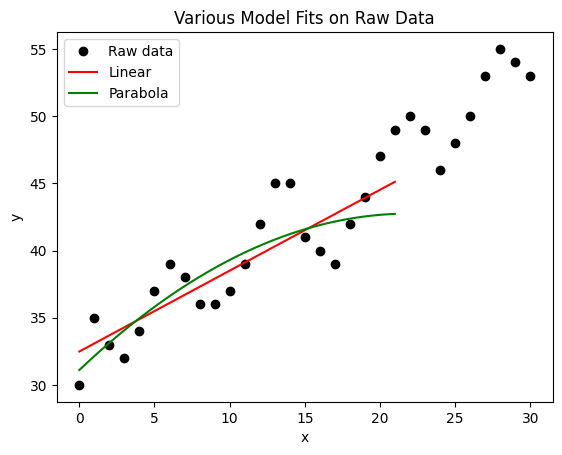

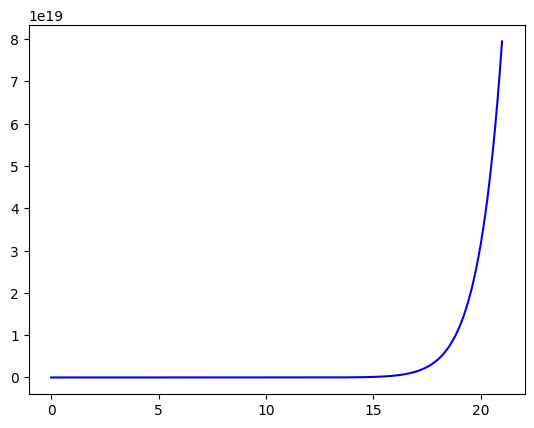

In [111]:
# set the initial guess for the parameters
line0 = np.array([1, 20])
parab0 = np.array([1, 5, 20])
poly_guess = np.concatenate((np.linspace(1e-16, 1e-15, 5), np.linspace(1e-5, 10, 10), np.linspace(1e-9, 1e-5, 5)))
print(poly_guess)

inv = []
a = -1
for i in np.arange(0, 20):
  inv.append(a)
  a *= -1
poly0 = np.multiply(inv, poly_guess)

# perform optimization
res_line = opt.minimize(fit_line, line0, args=(train_x, train_y), method='Nelder-Mead')
res_parab = opt.minimize(fit_parab, parab0, args=(train_x, train_y), method='Nelder-Mead')
res_poly = opt.minimize(fit_poly, poly0, args=(train_x, train_y), method='Nelder-Mead')


# get the optimized parameters
mins_line = res_line.x
mins_parab = res_parab.x
mins_poly = res_poly.x
print(mins_poly)

# generate the data for plotting
x3 = np.arange(0, 21, 0.01)
y_line = (mins_line[0] * x3 + mins_line[1])
y_parab = (mins_parab[0] * x3 ** 2 + mins_parab[1] * x3 + mins_parab[2])

y_poly = 0
for i in np.arange(0, 20):
      y_poly += mins_poly[i] * x3 ** i

# plot the raw data and the fitted curve
plt.figure(4)
plt.plot(x, y, 'ko', label='Raw data')
plt.plot(x3, y_line, 'r-', label='Linear')
plt.plot(x3, y_parab, 'g-', label='Parabola')

plt.title("Various Model Fits on Raw Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(5)
plt.plot(x3, y_poly, 'b-', label='19th degree Polynomial')

In [99]:
test_x = x[-10:]
test_y = y[-10:]

In [107]:
print("Least-square error - Linear:", fit_line(mins_line, test_x, test_y))
print("Least-square error - Parabola:", fit_parab(mins_parab, test_x, test_y))
print("Least-square error - Poly:", fit_parab(mins_poly, test_x, test_y))

Least-square error - Linear: 3.4392152095902313
Least-square error - Parabola: 9.035173606338141
Least-square error - Poly: 50.77499384539596


## Problem iv

In [119]:
train_x2 = np.concatenate((x[:10], x[-10:]))
train_y2 = np.concatenate((y[:10], y[-10:]))

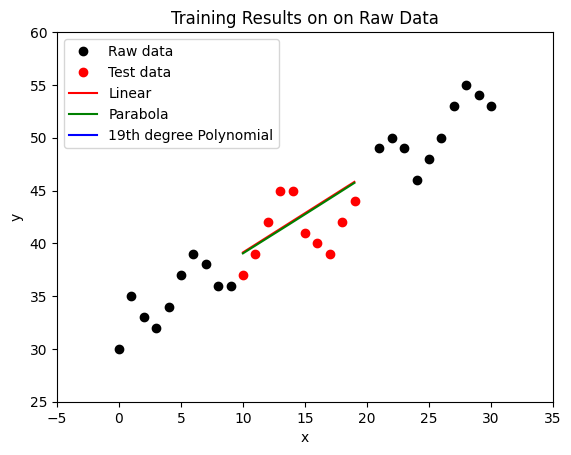

In [144]:
# set the initial guess for the parameters
line0 = np.array([1, 20])
parab0 = np.array([1, 5, 10])
poly_guess = np.concatenate((np.linspace(1e-16, 1e-15, 5), np.linspace(1e-5, 10, 10), np.linspace(1e-9, 1e-5, 5)))

inv = []
a = -1
for i in np.arange(0, 20):
  inv.append(a)
  a *= -1
poly0 = np.multiply(inv, poly_guess)

# perform optimization
res_line = opt.minimize(fit_line, line0, args=(train_x2, train_y2), method='Nelder-Mead')
res_parab = opt.minimize(fit_parab, parab0, args=(train_x2, train_y2), method='Nelder-Mead')
res_poly = opt.minimize(fit_poly, poly0, args=(train_x2, train_y2), method='Nelder-Mead')


# get the optimized parameters
mins_line = res_line.x
mins_parab = res_parab.x
mins_poly = res_poly.x

# generate the data for plotting - training
# x3 = np.concatenate((np.arange(0, 11, 0.01), np.arange(20, 31, 0.01)))
# x3 = np.arange(10, 21, .01)
# y_line = (mins_line[0] * x3 + mins_line[1])
# y_parab = (mins_parab[0] * x3 ** 2 + mins_parab[1] * x3 + mins_parab[2])


# generate the data for plotting - test
test_x = x[10:20]
test_y = y[10:20]

x3 = np.arange(np.min(x[10:20]), np.max(x[10:20]), .01)
pred_y_line = (mins_line[0] * x3 + mins_line[1])
pred_y_parab = (mins_parab[0] * x3 ** 2 + mins_parab[1] * x3 + mins_parab[2])

y_poly = 0
pred_y_poly = 0
for i in np.arange(10, 20):
      #y_poly += mins_poly[i] * x3 ** i
      pred_y_poly += mins_poly[i] * x3 ** i


# plot the raw data and the curves on test data
plt.figure(4)
plt.xlim(-5, 35)
plt.ylim(25, 60)
plt.plot(train_x2, train_y2, 'ko', label='Raw data')
plt.plot(test_x, test_y, 'ro', label='Test data')
plt.plot(x3, pred_y_line, 'r-', label='Linear')
plt.plot(x3, pred_y_parab, 'g-', label='Parabola')
plt.plot(x3, pred_y_poly, 'b-', label='19th degree Polynomial')

plt.title("Training Results on on Raw Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# # plot the raw data and the test result curves
# plt.figure(5)
# plt.xlim(-5, 35)
# plt.ylim(25, 60)
# plt.plot(train_x2, train_y2, 'ko', label='Raw data')
# plt.plot(test_x, test_y, 'ro', label='Test data')
# plt.plot(x3, pred_y_line, 'r-', label='Linear')
# plt.plot(x3, pred_y_parab, 'g-', label='Parabola')
# plt.plot(x3, pred_y_poly, 'b-', label='19th degree Polynomial')
